In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from scipy.stats.stats import pearsonr


###                    Requirements Specification and analysis

The dataset(PHL's Exoplanet Catalog of the Planetary Habitability Laboratory) I've used is created and maintained by 
#### The Planetary Habitability Laboratory, University of Puerto Rico at Arecibo

It can be found at the following url: http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

The PHL's Exoplanets Catalog (PHL-EC) contains observed and modeled parameters for all currently confirmed exoplanets from the Extrasolar Pl
anets Encyclopedia and NASA Kepler candidates from the NASA Exoplanet Archive, including those potentially habitable. It also contains a few still 
unconfirmed exoplanets of interest. The main difference between PHL-EC and other exoplanets databases is that it contains more estimated stellar 
and planetary parameters, habitability assessments with various habitability metrics, planetary classifications, and many corrections. 
Some interesting inclusions are the identification of those stars in the Catalog of Nearby Habitable Systems (HabCat aka HabStar Catalog), the apparent size and 
brightness of stars and planets as seen from a vantage point (i.e. moon-Earth distance), and the location constellation of each planet.

Reasons behind chosing this dataset over any other is because of it's expanded target list combining measures and modeled parameters from various sources. Hence, it provides a good metric for visualization and statistical analysis. 

##### PHL-EC consists of 68 features and 3875 confirmed exoplanets. 

In [2]:
allExoplanets = pd.read_csv('confirmed_exoplanets.csv',low_memory=False)
#coll = ['P. Name', 'P. Name Kepler', 'P. Name KOI', 'P. Zone Class',
 #      'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class',
  #     'P. Habitable Class', 'P. Min Mass (EU)', 'P. Mass (EU)',
   #    'P. Max Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)',
   #    'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)',
    #   'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)',
     #  'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Ts Min (K)', 'P. Ts Mean (K)',
      # 'P. Ts Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)',
       #'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity',
#       'P. Mean Distance (AU)', 'P. Inclination (deg)', 'P. Omega (deg)',
 #      'S. Name', 'S. Name HD', 'S. Name HIP', 'S. Constellation', 'S. Type',
  #     'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)',
   #    'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)',
    #   'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet',
     #  'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ',
      # 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC',
       #'P. HZA', 'P. HZI', 'P. SPH', 'P. Int ESI', 'P. Surf ESI', 'P. ESI',
#       'S. HabCat', 'P. Habitable', 'P. Hab Moon', 'P. Confirmed',
 #      'P. Disc. Method', 'P. Disc. Year']
print('Features, Data Points = '+str(allExoplanets.shape))


Features, Data Points = (3875, 68)


In [3]:
print('All Features of PHL-EC:\n\n')
for i in allExoplanets:
    print("{feature}".format(feature=i),end='   ',sep='\t')

All Features of PHL-EC:


P. Name   P. Name Kepler   P. Name KOI   P. Zone Class   P. Mass Class   P. Composition Class   P. Atmosphere Class   P. Habitable Class   P. Min Mass (EU)   P. Mass (EU)   P. Max Mass (EU)   P. Radius (EU)   P. Density (EU)   P. Gravity (EU)   P. Esc Vel (EU)   P. SFlux Min (EU)   P. SFlux Mean (EU)   P. SFlux Max (EU)   P. Teq Min (K)   P. Teq Mean (K)   P. Teq Max (K)   P. Ts Min (K)   P. Ts Mean (K)   P. Ts Max (K)   P. Surf Press (EU)   P. Mag   P. Appar Size (deg)   P. Period (days)   P. Sem Major Axis (AU)   P. Eccentricity   P. Mean Distance (AU)   P. Inclination (deg)   P. Omega (deg)   S. Name   S. Name HD   S. Name HIP   S. Constellation   S. Type   S. Mass (SU)   S. Radius (SU)   S. Teff (K)   S. Luminosity (SU)   S. [Fe/H]   S. Age (Gyrs)   S. Appar Mag   S. Distance (pc)   S. RA (hrs)   S. DEC (deg)   S. Mag from Planet   S. Size from Planet (deg)   S. No. Planets   S. No. Planets HZ   S. Hab Zone Min (AU)   S. Hab Zone Max (AU)   P. HZD   P. HZC

In [4]:
## object type scienctific notation ke float korar portion ## last checkpoint

allExoplanets['P. SFlux Max (EU)'] = pd.to_numeric(allExoplanets['P. SFlux Max (EU)'],errors='coerce')

allExoplanets['P. SFlux Mean (EU)'] = pd.to_numeric(allExoplanets['P. SFlux Mean (EU)'],errors='coerce')

allExoplanets['P. SFlux Min (EU)'] = pd.to_numeric(allExoplanets['P. SFlux Min (EU)'],errors='coerce')

In [5]:
cat = len(allExoplanets.select_dtypes(include=['object']).columns)
num = len(allExoplanets.select_dtypes(include=['int64','float64']).columns)
print('Features of allExoplanets consists of ', cat, 'categorical', ' and ',
      num, 'numerical features')
print('\n\nCategorical Features:\n ')
for i in allExoplanets.select_dtypes(include=['object']).columns:
    print("{feature}".format(feature=i),end='\t')
print('\n\nNumerical Features:\n ')
for i in allExoplanets.select_dtypes(include=['int64','float64']).columns:
    print("{feature}".format(feature=i),end='\t')

Features of allExoplanets consists of  14 categorical  and  54 numerical features


Categorical Features:
 
P. Name	P. Name Kepler	P. Zone Class	P. Mass Class	P. Composition Class	P. Atmosphere Class	P. Habitable Class	S. Name	S. Name HD	S. Name HIP	S. Constellation	S. Type	P. Disc. Method	P. Disc. Year	

Numerical Features:
 
P. Name KOI	P. Min Mass (EU)	P. Mass (EU)	P. Max Mass (EU)	P. Radius (EU)	P. Density (EU)	P. Gravity (EU)	P. Esc Vel (EU)	P. SFlux Min (EU)	P. SFlux Mean (EU)	P. SFlux Max (EU)	P. Teq Min (K)	P. Teq Mean (K)	P. Teq Max (K)	P. Ts Min (K)	P. Ts Mean (K)	P. Ts Max (K)	P. Surf Press (EU)	P. Mag	P. Appar Size (deg)	P. Period (days)	P. Sem Major Axis (AU)	P. Eccentricity	P. Mean Distance (AU)	P. Inclination (deg)	P. Omega (deg)	S. Mass (SU)	S. Radius (SU)	S. Teff (K)	S. Luminosity (SU)	S. [Fe/H]	S. Age (Gyrs)	S. Appar Mag	S. Distance (pc)	S. RA (hrs)	S. DEC (deg)	S. Mag from Planet	S. Size from Planet (deg)	S. No. Planets	S. No. Planets HZ	S. Hab Zone Min (AU)	S. Hab Z

In [6]:
desc = pd.DataFrame()
for c in allExoplanets:
    desc[c]=(allExoplanets[c].describe())
desc.head

<bound method NDFrame.head of          P. Name P. Name Kepler  P. Name KOI P. Zone Class P. Mass Class  \
count       3875           2328        933.0          3829          3869   
unique      3875           2328          NaN             3             6   
top     K2-141 b   Kepler-524 b          NaN           Hot        Jovian   
freq           1              1          NaN          3251          1273   

       P. Composition Class P. Atmosphere Class P. Habitable Class  \
count                  3834                3790               3875   
unique                    5                   3                  5   
top                     gas         metals-rich      non-habitable   
freq                   2074                2372               3820   

        P. Min Mass (EU)  P. Mass (EU)      ...        P. SPH  P. Int ESI  \
count             1148.0        3842.0      ...        1801.0      3875.0   
unique               NaN           NaN      ...           NaN         NaN   
top    

##### Percentage of Null Value in each feature of the given data set

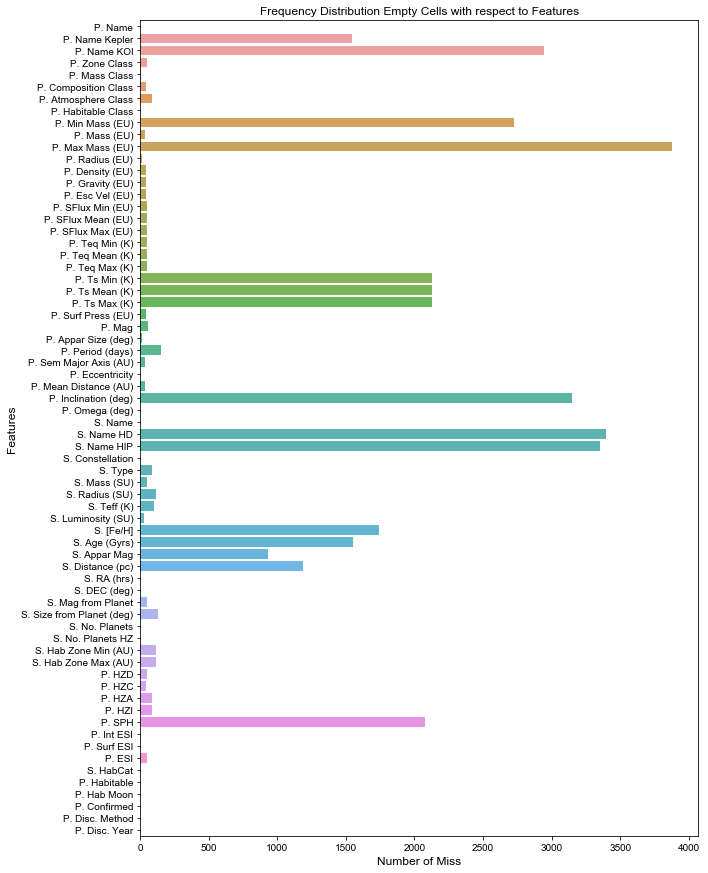

In [7]:
#allExoplanets.isnull()
###print(allExoplanets.isnull().sum() * 100 / len(allExoplanets),end='\t\t\t\t')
f, ax = plt.subplots(figsize=(10, 15))

stat_count = allExoplanets.isnull().sum()
sns.set(style="darkgrid")
sns.barplot(stat_count.values,stat_count.index, alpha=0.9)
plt.title('Frequency Distribution Empty Cells with respect to Features')
plt.xlabel('Number of Miss', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

## Some visualisations regarding the database

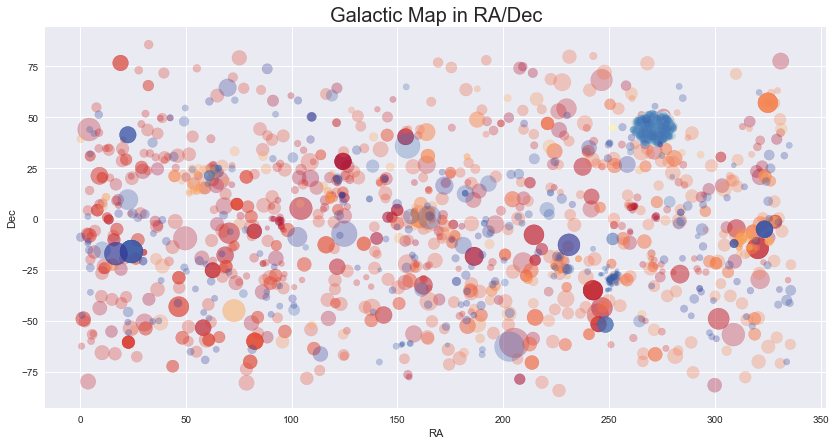

In [8]:
x = allExoplanets['S. RA (hrs)']*14
y = allExoplanets['S. DEC (deg)']
#area = np.pi * allExoplanets['S. Radius (SU)']**2
csp=plt.cm.RdYlBu(np.linspace(0,1,len(allExoplanets)))


fig,ax = plt.subplots(figsize=(14,7))
dists = allExoplanets['S. Distance (pc)']
dists.fillna(value=np.mean(dists),inplace=True)
ax=plt.scatter(x,y,s=1000/dists**.5,alpha=0.3,c=csp,cmap=cm.coolwarm)
#ax=plt.scatter(x, y, s=area, c = colors, cmap = colormap, alpha=0.3)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Galactic Map in RA/Dec',size=20)
plt.figure(1,figsize=(16,12))

plt.show()

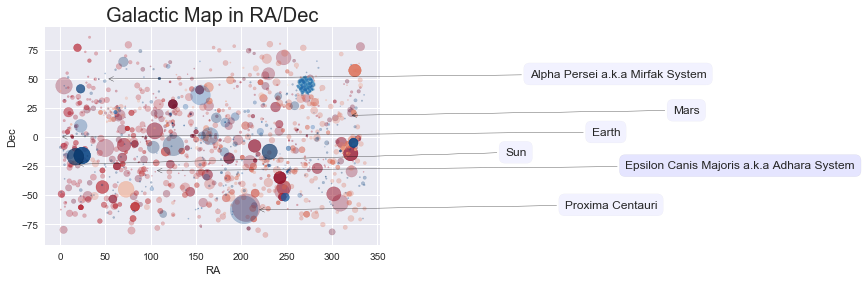

In [9]:
## x = allExoplanets['S. RA (hrs)']*14
y = allExoplanets['S. DEC (deg)']
#area = np.pi * allExoplanets['S. Radius (SU)']**2
csp=plt.cm.RdBu(np.linspace(0,1,len(allExoplanets)))


fig,ax = plt.subplots()
dists = allExoplanets['S. Distance (pc)']
dists.fillna(value=np.mean(dists),inplace=True)
ax=plt.scatter(x,y,s=1000/dists,alpha=0.3,c=csp,cmap=cm.coolwarm)
#ax=plt.scatter(x, y, s=area, c = colors, cmap = colormap, alpha=0.3)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Galactic Map in RA/Dec',size=20)
plt.figure(1,figsize=(16,12))




plt.annotate('Earth', xy = (0,0), 
             xytext = (560, 0),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.05),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )

plt.annotate('Mars', xy = (319.3208,18.6386), 
             xytext = (350, 0),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.05),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )

plt.annotate('Sun', xy = (18,-23.5), 
             xytext = (450, 7),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.05),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )

plt.annotate('Proxima Centauri', xy = (217.4292,-62.6794), 
             xytext = (400, 0),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.05),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )

plt.annotate('Alpha Persei a.k.a Mirfak System', xy = (51.0792,49.8611), 
             xytext = (600, 0),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.05),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )

plt.annotate('Epsilon Canis Majoris a.k.a Adhara System', xy = (104.6583,-28.9719), 
             xytext = (700, 0),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.1),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )
             

plt.show()

# Visualization 
* Size
    > Size is denoting the relative distance from earth.
    > actual size is normalized for better visualisation
* Color
    > color incrementation is used for better visualisation and it increments over all datapoints.
* Filling Up procedure
    > missing distance values are filled with mean value of distance

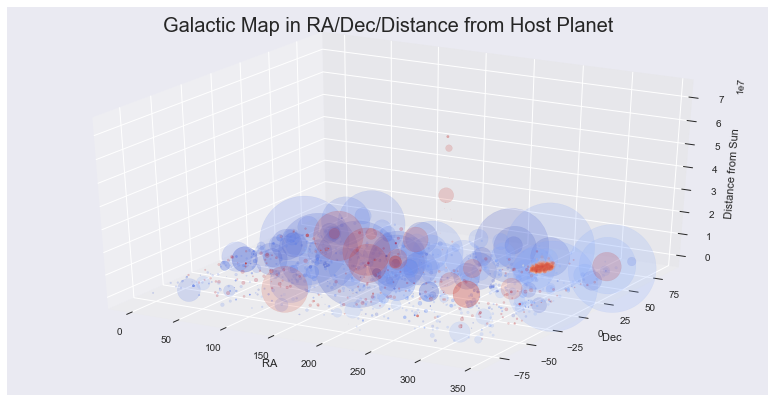

In [10]:
x = allExoplanets['S. RA (hrs)']*14
y = allExoplanets['S. DEC (deg)']
z = allExoplanets['S. Distance (pc)']**2
area = np.pi * allExoplanets['S. Radius (SU)']**2
sl = plt.cm.coolwarm(np.linspace(0,1,len(allExoplanets)))
#csp2=plt.cm.(oec['HostStarTempK'])

fig = plt.figure(figsize=(30,50))
ax = fig.add_subplot(621, projection='3d')

ax.axis('on')
ax.scatter(x,y,z,cmap=cm.coolwarm,alpha=0.2,s=area,c=sl)
ax.set_xlabel('RA ')
ax.set_ylabel('Dec ')
ax.set_zlabel('Distance from Sun')
plt.title('Galactic Map in RA/Dec/Distance from Host Planet',size=20)
plt.show()

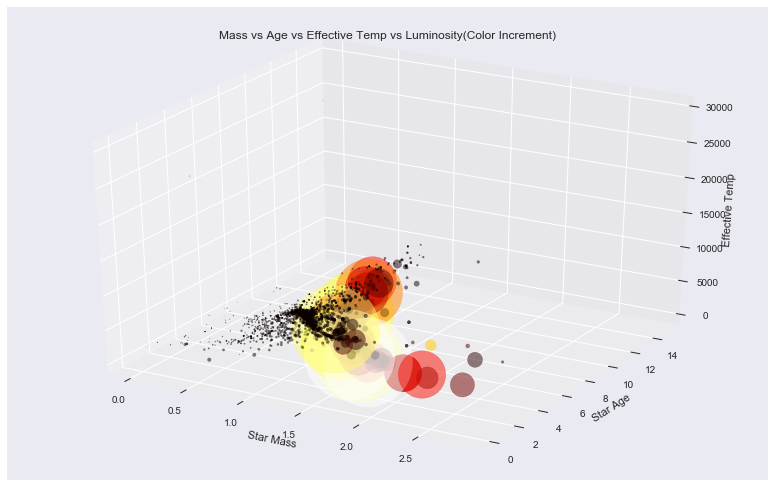

In [11]:
x2 = allExoplanets['S. Mass (SU)']
y2 = allExoplanets['S. Age (Gyrs)']
z2 = allExoplanets['S. Teff (K)']

area2 = np.pi * allExoplanets['S. Radius (SU)']**2

#x1 = oec['RA_dd']
#y1 = oec['Dec_dd']
#z1 = dists/1000
#area = np.pi * oec['HostStarRadiusSlrRad']**2

#csp2=plt.cm.(oec['HostStarTempK'])

fig = plt.figure(figsize=(30,40))
ax = fig.add_subplot(421, projection='3d')

ax.axis('on')
ax.scatter(x2,y2,z2,cmap=cm.hot,alpha=0.5,s=area2,c=allExoplanets['S. Luminosity (SU)'])
ax.set_xlabel('Star Mass')
ax.set_ylabel('Star Age')
ax.set_zlabel('Effective Temp')
plt.title('Mass vs Age vs Effective Temp vs Luminosity(Color Increment)')
plt.show()

Data Preprocessing 
-------
PHL-EC is a very complex and sensitive dataset. Every observation is recorded with high accuracy, That's why we need to perform sensitivity analysis before cleaning, imputing, scaling any part of it. 

Detection of Habitable Exoplanets
---------------
 habstar or habitability, is currently defined as an area, such as a planet or a moon, where liquid water can exist for at least a short duration of time

* A "habitable" planet should:
    * Orbit a star that remains stable in output for billions of years
    * Be at a distance from the star that results in its achieving a suitable temperature so its surface water is liquid, not frozen
    * Have a circular orbit, so constant conditions prevail for its entire "year"
    * Not orbit a star that is too close to a cosmic explosion like a supernova
    * Be far enough from massive planets that they do not continually divert asteroids to hit it or perturb its orbit strongly
    * Probably not be so massive that it retains hydrogen and becomes a "gas giant"
    * Perhaps it is also essential to have a massive planet well outside its orbit, like Jupiter, to divert potential devastating asteroids away, or to make them destroy themselves (as in the asteroid belt).


### Habitability
---

> habstar or habitability, is currently defined as an area, such as a planet or a moon, where liquid water can exist for at least a short duration of time

### Solar Twin
---------------

> A true solar twins as noted by the Lowell Observatory should have a temperature within ~10 K of the Sun. Space Telescope Science Institute, Lowell Observatory, noted in 1996 that temperature precision of ~10 K can be measured. A temperature of ~10 K reduces the solar twin list to near zero, so ±50 K is used for the chart


## Types of Planets


In PHL-EC, Planets are classified into five categories. This classification has been done on the basis of their thermal properties. 

### Mesoplanets [Asimov - 1989]: 
--- ---
>The planetary bodies whose sizes lie between Mercury and
Ceres falls under this category (smaller than Mercury and larger than Ceres). These are
also referred to as M-planets [Méndez - 2011]. These planets have mean global surface
temperature between 0◦C to 50◦C, a necessary condition for complex terrestrial life.
These are generally referred as Earth-like planets.


### Psychroplanets [Méndez - 2011]: 
--- ---
>These planets have mean global surface temperature
between -50◦C to 0◦C. Hence, the temperature is colder than optimal for sustenance of
terrestrial life

### Non-Habitable: 
--- ---
>Planets other than mesoplanets and psychroplanets do not have thermal
properties required to sustain life.

### Description Of Targeted Region

In [12]:
print(allExoplanets['P. Habitable Class'].describe())


count              3875
unique                5
top       non-habitable
freq               3820
Name: P. Habitable Class, dtype: object


In [13]:
print('Our Dataset,  or Target region if I be more precise, has been classified into 5 categories, which are:')
for i in allExoplanets['P. Habitable Class'].unique():
    print(i)

Our Dataset,  or Target region if I be more precise, has been classified into 5 categories, which are:
non-habitable
psychroplanet
mesoplanet
thermoplanet
hypopsychroplanet


In [14]:
print(allExoplanets['P. Habitable Class'].value_counts())

non-habitable        3820
mesoplanet             31
psychroplanet          18
hypopsychroplanet       3
thermoplanet            3
Name: P. Habitable Class, dtype: int64


#### Last three output clearly states that 'non - habitable' class is dominating over other classes. We should visualise the frequency to understand the issue more deeply.

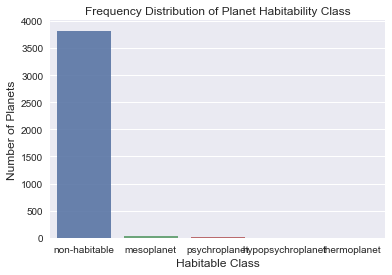

In [15]:
stat_count = allExoplanets['P. Habitable Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of Planet Habitability Class')
plt.ylabel('Number of Planets', fontsize=12)
plt.xlabel('Habitable Class', fontsize=12)
plt.show()


Thermoplanet: 
---
   >A class of planets, which has a temperature in the range of 50◦C-100◦C.
    This is warmer than the temperature range suited for most terrestrial life [Méndez2011].

Hypopsychroplanets: 
---
  > A class of planets whose temperature is below −50◦C. Planets
    belonging to this category are too cold for the survival of most terrestrial life [Méndez2011].

#### NOTE
    The above two classes have three data entities each in the augmented data set used. This
    number is inadequate for the task of classification, and hence the total of six entities
    were excluded from the experiment.

In [16]:
allExoplanets=allExoplanets[allExoplanets.iloc[:,7]!= 'thermoplanet']
allExoplanets['P. Habitable Class'].value_counts()

non-habitable        3820
mesoplanet             31
psychroplanet          18
hypopsychroplanet       3
Name: P. Habitable Class, dtype: int64

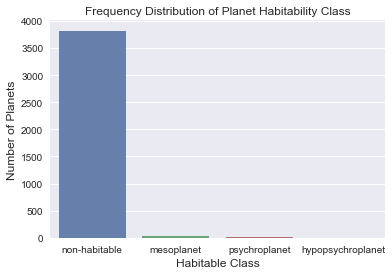

In [17]:
stat_count = allExoplanets['P. Habitable Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of Planet Habitability Class')
plt.ylabel('Number of Planets', fontsize=12)
plt.xlabel('Habitable Class', fontsize=12)
plt.show()

In [18]:
allExoplanets = allExoplanets[allExoplanets.iloc[:,7]!= 'hypopsychroplanet']
allExoplanets['P. Habitable Class'].value_counts()

non-habitable    3820
mesoplanet         31
psychroplanet      18
Name: P. Habitable Class, dtype: int64

In [19]:
allExoplanets['P. Habitable Class'].value_counts()

non-habitable    3820
mesoplanet         31
psychroplanet      18
Name: P. Habitable Class, dtype: int64

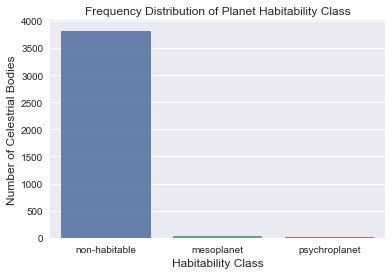

In [20]:
stat_count = allExoplanets['P. Habitable Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of Planet Habitability Class')
plt.ylabel('Number of Celestrial Bodies', fontsize=12)
plt.xlabel('Habitability Class', fontsize=12)
plt.show()

#####    thermoplanet and hypopsychroplanet instances are successfully removed
    


#### Note

Although thermoplanet and hypopsychroplanet class have been removed from the set for being the most submissive ones. Still, the ratio hasn't improved very much. This may result in High Accuracy and False Positives.

#### Feature Selection

P.NameKepler (planet’s name), Sname HD and Sname Hid (name
of parent star), S.constellation (name of constellation), Stype (type of parent star), P.SPH
(planet standard primary habitability), P.interior ESI (interior earth similarity index), P.surface
ESI (surface earth similarity index), P.disc method (method of discovery of planet), P.disc
year (year of discovery of planet), P. Max Mass, P. Min Mass, P.inclination and P.Hab Moon
(flag indicating planet’s potential as a habitable exomoons) were removed as these attributes
do not contribute to the nature of classification of habitability of a planet. Interior ESI
and surface ESI, however, together contribute to habitability, but since the data set directly
provides P.ESI, these two features were neglected. Following this, classification algorithms
were applied on the processed data set. In all, 50 features are used.

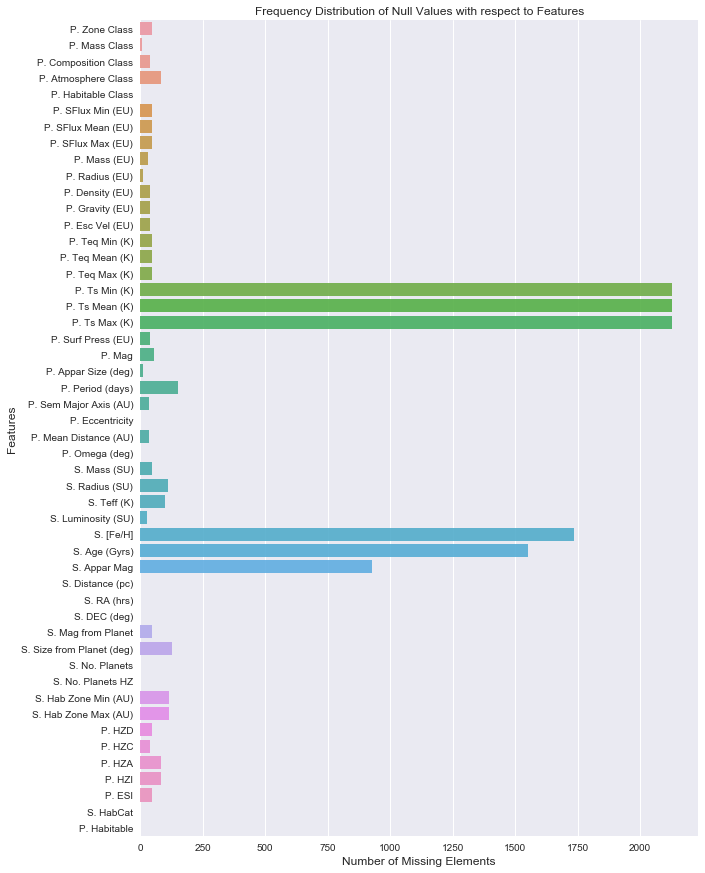

In [21]:
pred = ['P. Zone Class','P. Mass Class','P. Composition Class','P. Atmosphere Class',
                'P. Habitable Class',
                
                
                'P. SFlux Min (EU)','P. SFlux Mean (EU)','P. SFlux Max (EU)',
                'P. Mass (EU)','P. Radius (EU)','P. Density (EU)','P. Gravity (EU)',
                'P. Esc Vel (EU)','P. Teq Min (K)','P. Teq Mean (K)','P. Teq Max (K)',
                'P. Ts Min (K)','P. Ts Mean (K)','P. Ts Max (K)','P. Surf Press (EU)',
                'P. Mag','P. Appar Size (deg)','P. Period (days)','P. Sem Major Axis (AU)',
                'P. Eccentricity','P. Mean Distance (AU)','P. Omega (deg)','S. Mass (SU)',
                'S. Radius (SU)','S. Teff (K)','S. Luminosity (SU)','S. [Fe/H]','S. Age (Gyrs)',
                'S. Appar Mag','S. Distance (pc)','S. RA (hrs)','S. DEC (deg)',
                'S. Mag from Planet','S. Size from Planet (deg)','S. No. Planets',
                'S. No. Planets HZ','S. Hab Zone Min (AU)','S. Hab Zone Max (AU)',
                'P. HZD','P. HZC','P. HZA','P. HZI','P. ESI','S. HabCat','P. Habitable']

pred_cat = ['P. Zone Class','P. Mass Class','P. Composition Class','P. Atmosphere Class',
                'P. Habitable Class']
pred_num = ['P. SFlux Min (EU)','P. SFlux Mean (EU)','P. SFlux Max (EU)','P. Mass (EU)',
            'P. Radius (EU)','P. Density (EU)','P. Gravity (EU)',
                'P. Esc Vel (EU)','P. Teq Min (K)','P. Teq Mean (K)','P. Teq Max (K)',
                'P. Ts Min (K)','P. Ts Mean (K)','P. Ts Max (K)','P. Surf Press (EU)',
                'P. Mag','P. Appar Size (deg)','P. Period (days)','P. Sem Major Axis (AU)',
                'P. Eccentricity','P. Mean Distance (AU)','P. Omega (deg)','S. Mass (SU)',
                'S. Radius (SU)','S. Teff (K)','S. Luminosity (SU)','S. [Fe/H]','S. Age (Gyrs)',
                'S. Appar Mag','S. Distance (pc)','S. RA (hrs)','S. DEC (deg)',
                'S. Mag from Planet','S. Size from Planet (deg)','S. No. Planets',
                'S. No. Planets HZ','S. Hab Zone Min (AU)','S. Hab Zone Max (AU)',
                'P. HZD','P. HZC','P. HZA','P. HZI','P. ESI','S. HabCat','P. Habitable']

examine = pd.DataFrame()
examine =  allExoplanets[pred]


f, ax = plt.subplots(figsize=(10, 15))

stat_count = examine.isnull().sum()
sns.set(style="darkgrid")
sns.barplot(stat_count.values,stat_count.index, alpha=0.9)
plt.title('Frequency Distribution of Null Values with respect to Features')
plt.xlabel('Number of Missing Elements', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


In [22]:
cat1 = len(examine.select_dtypes(include=['object']).columns)
num1 = len(examine.select_dtypes(include=['int64','float64']).columns)
print('Features of examine consists of ', cat, 'categorical', ' and ',
      num, 'numerical features')
print('\n\nCategorical Features:\n ')
for i in examine.select_dtypes(include=['object']).columns:
    print("{feature}".format(feature=i),end='\t')
print('\n\nNumerical Features:\n ')
for i in examine.select_dtypes(include=['int64','float64']).columns:
    print("{feature}".format(feature=i),end='\t')

Features of examine consists of  14 categorical  and  54 numerical features


Categorical Features:
 
P. Zone Class	P. Mass Class	P. Composition Class	P. Atmosphere Class	P. Habitable Class	

Numerical Features:
 
P. SFlux Min (EU)	P. SFlux Mean (EU)	P. SFlux Max (EU)	P. Mass (EU)	P. Radius (EU)	P. Density (EU)	P. Gravity (EU)	P. Esc Vel (EU)	P. Teq Min (K)	P. Teq Mean (K)	P. Teq Max (K)	P. Ts Min (K)	P. Ts Mean (K)	P. Ts Max (K)	P. Surf Press (EU)	P. Mag	P. Appar Size (deg)	P. Period (days)	P. Sem Major Axis (AU)	P. Eccentricity	P. Mean Distance (AU)	P. Omega (deg)	S. Mass (SU)	S. Radius (SU)	S. Teff (K)	S. Luminosity (SU)	S. [Fe/H]	S. Age (Gyrs)	S. Appar Mag	S. Distance (pc)	S. RA (hrs)	S. DEC (deg)	S. Mag from Planet	S. Size from Planet (deg)	S. No. Planets	S. No. Planets HZ	S. Hab Zone Min (AU)	S. Hab Zone Max (AU)	P. HZD	P. HZC	P. HZA	P. HZI	P. ESI	S. HabCat	P. Habitable	

#### Imputing of Numerical Features

    Numerical Features will be imputed with Means

Total of null Values in each Feature of Numerical Features region: 



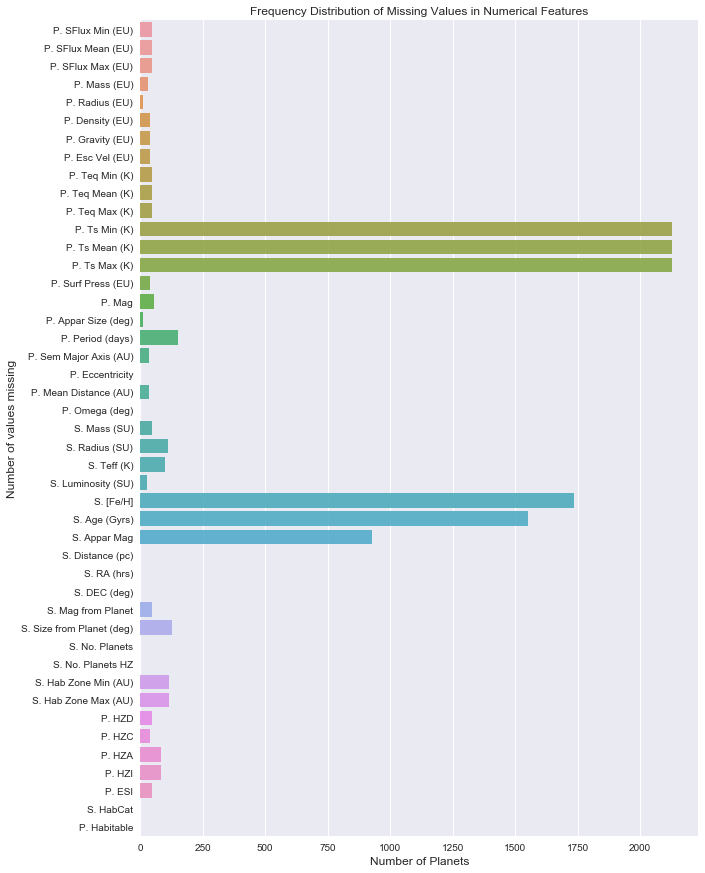

In [23]:
print("Total of null Values in each Feature of Numerical Features region: \n")
#imputed_exnum=examine.iloc[:,8:]
#print(examine.iloc[:,8:].isnull().sum())
fig , ax = plt.subplots(figsize=(10,15))
stat_count = examine.iloc[:,5:].isnull().sum()
sns.set(style="darkgrid")
sns.barplot(stat_count.values, stat_count.index, alpha=0.9)
plt.title('Frequency Distribution of Missing Values in Numerical Features')
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Number of values missing', fontsize=12)
plt.show()

In [24]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Training imputer on the numerical region of 'Examine' 
mean_imputer = mean_imputer.fit(examine.iloc[:,5:])
examine.iloc[:,5:] = mean_imputer.transform(examine.iloc[:,5:])

numpart = examine.iloc[:,5:]

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


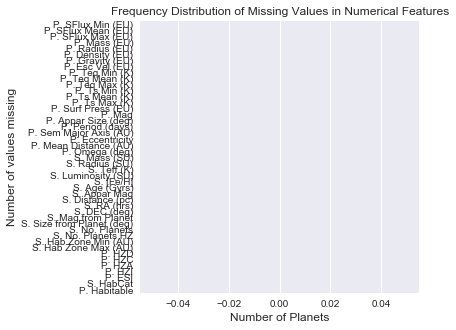

In [25]:
#print(examine.iloc[:,8:].isnull().sum())

fig , ax = plt.subplots(figsize=(5,5))
stat_count = examine.iloc[:,5:].isnull().sum()
sns.set(style="darkgrid")
sns.barplot(stat_count.values, stat_count.index, alpha=0.9)
plt.title('Frequency Distribution of Missing Values in Numerical Features')
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Number of values missing', fontsize=12)
plt.show()

### Imputing of Categorical Features
    Categorical Features are imputed by most frequent strategy

Total of null Values in each Feature of Categorical Features region: 



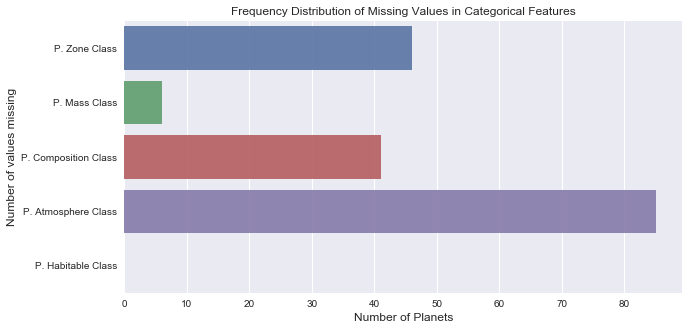

In [26]:
#imputed_exnum=examine.iloc[:,8:]
#print(examine.iloc[:,:8].isnull().sum())
#f, ax = plt.subplots(figsize=(5, 5))

###for i in examine[pred_cat]:
###    stat_count = examine[i].value_counts()
###    sns.set(style="darkgrid")
###    sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
###    plt.title('Frequency Distribution of {col}'.format(col=i))
###    plt.ylabel('Number of Planets', fontsize=12)
###    plt.xlabel('{s}'.format(s=i), fontsize=12)
###plt.show()
print("Total of null Values in each Feature of Categorical Features region: \n")
#imputed_exnum=examine.iloc[:,8:]
#print(examine.iloc[:,8:].isnull().sum())
fig , ax = plt.subplots(figsize=(10,5))
stat_count = examine.iloc[:,:5].isnull().sum()
sns.set(style="darkgrid")
sns.barplot(stat_count.values, stat_count.index, alpha=0.9)
plt.title('Frequency Distribution of Missing Values in Categorical Features')
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Number of values missing', fontsize=12)
plt.show()

In [27]:
#dataframe imputer 
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
    def __init__(self):
            #cat -> most frq , num -> mean
        return None
    def fit(self, X, y=None):
        
        self.fill = pd.Series([X[c].value_counts().index[0] 
                               if X[c].dtype == np.dtype('O') 
                               else X[c].mean() for c in X],
                                 index = X.columns)
        
        return self
    
    def transform(self,X,y=None):
        return X.fillna(self.fill)
    
examine.iloc[:,:4] = DataFrameImputer().fit_transform(examine.iloc[:,:4])

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
catpart = examine.iloc[:,:5]

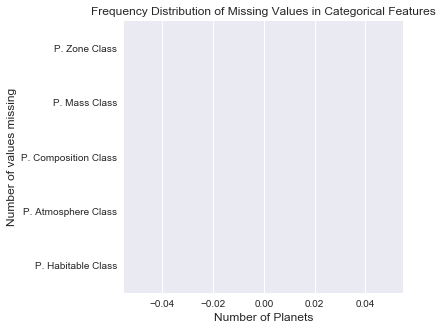

In [29]:
#imputed_exnum=examine.iloc[:,8:]
#print(examine.iloc[:,:8].isnull().sum())

fig , ax = plt.subplots(figsize=(5,5))
stat_count = examine.iloc[:,:5].isnull().sum()
sns.set(style="darkgrid")
sns.barplot(stat_count.values, stat_count.index, alpha=0.9)
plt.title('Frequency Distribution of Missing Values in Categorical Features')
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Number of values missing', fontsize=12)
plt.show()

### Label Frequency in Categorical Features

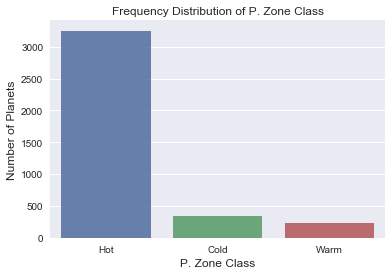

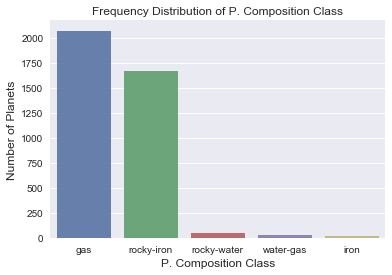

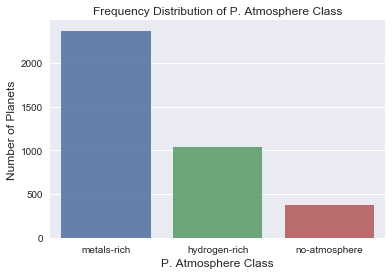

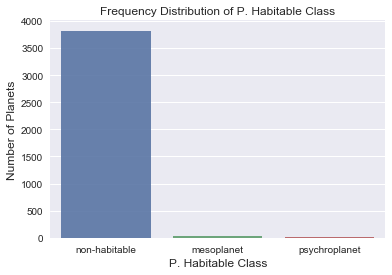

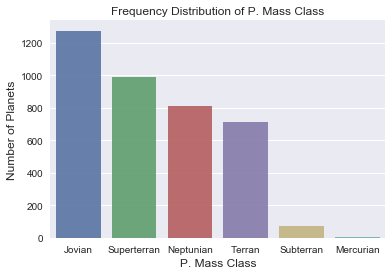

In [30]:
stat_count = allExoplanets['P. Zone Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of P. Zone Class')
plt.ylabel('Number of Planets', fontsize=12)
plt.xlabel('P. Zone Class', fontsize=12)
plt.show()

stat_count = allExoplanets['P. Composition Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of P. Composition Class')
plt.ylabel('Number of Planets', fontsize=12)
plt.xlabel('P. Composition Class', fontsize=12)
plt.show()

stat_count = allExoplanets['P. Atmosphere Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of P. Atmosphere Class')
plt.ylabel('Number of Planets', fontsize=12)
plt.xlabel('P. Atmosphere Class', fontsize=12)
plt.show()

stat_count = allExoplanets['P. Habitable Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of P. Habitable Class')
plt.ylabel('Number of Planets', fontsize=12)
plt.xlabel('P. Habitable Class', fontsize=12)
plt.show()

stat_count = allExoplanets['P. Mass Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stat_count.index, stat_count.values, alpha=0.9)
plt.title('Frequency Distribution of P. Mass Class')
plt.ylabel('Number of Planets', fontsize=12)
plt.xlabel('P. Mass Class', fontsize=12)
plt.show()


### Present Status of my database is:

In [31]:

#examine2 = DataFrameImputer().fit_transform(examine)
### taking a backup
#examine2.to_csv('exoplanets_imputed_notencoded.csv')
#examine2
#examine.isna().sum()

All the Features have been imputed. Now, What I'm gonna do is to encode all the variables. Before that, separating the Independent variable, i.e, separating X and y.

### Selection of X and y

In [32]:
y=examine['P. Habitable Class']
dependent = ['P. Zone Class','P. Mass Class','P. Composition Class','P. Atmosphere Class',
                
             
             'P. SFlux Min (EU)','P. SFlux Mean (EU)','P. SFlux Max (EU)',   
                'P. Mass (EU)','P. Radius (EU)','P. Density (EU)','P. Gravity (EU)',
                'P. Esc Vel (EU)','P. Teq Min (K)','P. Teq Mean (K)','P. Teq Max (K)',
                'P. Ts Min (K)','P. Ts Mean (K)','P. Ts Max (K)','P. Surf Press (EU)',
                'P. Mag','P. Appar Size (deg)','P. Period (days)','P. Sem Major Axis (AU)',
                'P. Eccentricity','P. Mean Distance (AU)','P. Omega (deg)','S. Mass (SU)',
                'S. Radius (SU)','S. Teff (K)','S. Luminosity (SU)','S. [Fe/H]','S. Age (Gyrs)',
                'S. Appar Mag','S. Distance (pc)','S. RA (hrs)','S. DEC (deg)',
                'S. Mag from Planet','S. Size from Planet (deg)','S. No. Planets',
                'S. No. Planets HZ','S. Hab Zone Min (AU)','S. Hab Zone Max (AU)',
                'P. HZD','P. HZC','P. HZA','P. HZI','P. ESI','S. HabCat','P. Habitable']
X =  examine[dependent]


In [33]:
print('X and y are of shape '+str(X.shape)+' and '+str(y.shape)+' respectively')

X and y are of shape (3869, 49) and (3869,) respectively


#### Current Status of our dataset

In [34]:
examine.head()

,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. SFlux Min (EU),P. SFlux Mean (EU),P. SFlux Max (EU),P. Mass (EU),P. Radius (EU),...,S. No. Planets HZ,S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI,S. HabCat,P. Habitable
0,Cold,Jovian,gas,hydrogen-rich,non-habitable,4.080000e-06,4.080000e-06,4.080000e-06,4451.16,19.04,...,0.0,0.540,1.362,800.07,23.51,85.62,0.00,0.05,0.0,0.0
1,Cold,Jovian,gas,hydrogen-rich,non-habitable,2.166914e-02,2.166914e-02,2.166914e-02,6358.80,10.94,...,0.0,0.461,1.143,9.07,15.30,45.41,0.02,0.07,0.0,0.0
2,Cold,Jovian,gas,hydrogen-rich,non-habitable,3.960000e-06,3.960000e-06,3.960000e-06,4133.22,11.40,...,0.0,0.136,0.347,793.67,12.57,107.44,0.00,0.06,0.0,0.0
3,Cold,Jovian,gas,hydrogen-rich,non-habitable,1.030000e-05,1.030000e-05,1.030000e-05,6358.80,11.20,...,0.0,0.136,0.347,490.45,15.72,119.46,0.00,0.08,0.0,0.0
4,Cold,Jovian,gas,hydrogen-rich,non-habitable,2.370000e-07,2.370000e-07,2.370000e-07,4419.37,16.13,...,0.0,0.062,0.165,3028.82,19.46,133.25,0.00,0.06,0.0,0.0


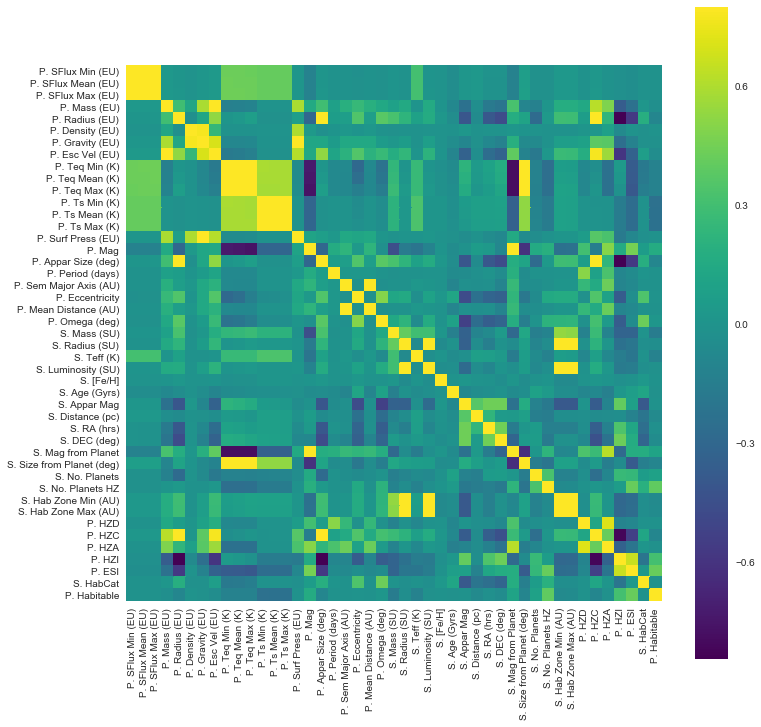

In [35]:
corrmat = examine.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True,cmap=cm.viridis);



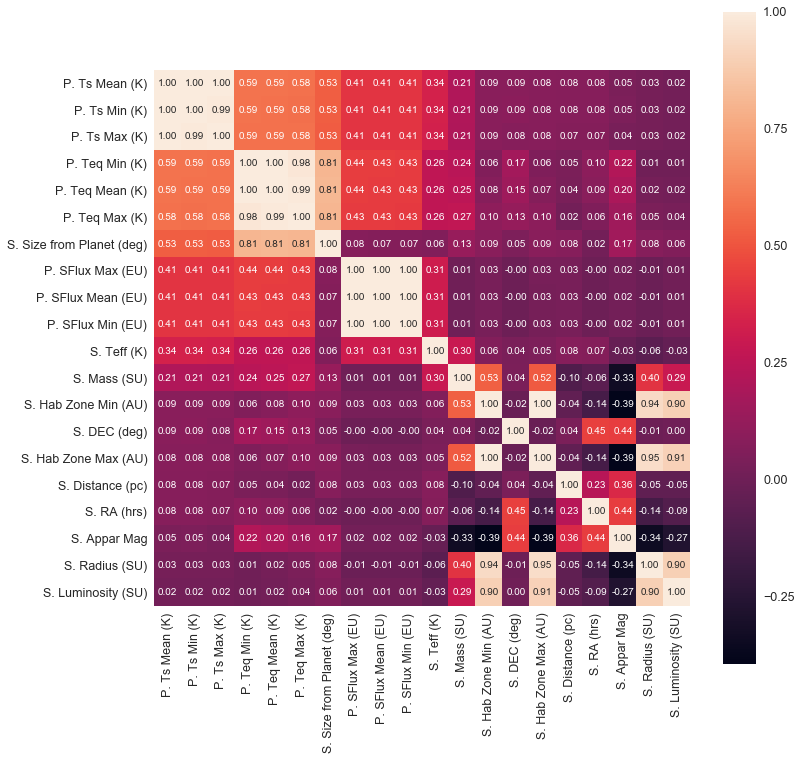

In [52]:
# Top 10 Heatmap
k = 20 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 12))
cols = corrmat.nlargest(k,'P. Ts Mean (K)')['P. ESI'].index
cm = np.corrcoef(examine[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Encoding the data

In [37]:
X.shape

(3869, 49)

In [38]:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Encoding the Independent Variable
X = pd.concat([X,pd.get_dummies(X['P. Zone Class'], prefix='P. Zone Class',drop_first=True)],axis=1)
X.drop(['P. Zone Class'],axis=1, inplace=True)

X = pd.concat([X,pd.get_dummies(X['P. Mass Class'], prefix='P. Mass Class',drop_first=True)],axis=1)
X.drop(['P. Mass Class'],axis=1, inplace=True)

X = pd.concat([X,pd.get_dummies(X['P. Composition Class'], prefix='P. Composition Class',drop_first=True)],axis=1)
X.drop(['P. Composition Class'],axis=1, inplace=True)

X = pd.concat([X,pd.get_dummies(X['P. Atmosphere Class'], prefix='P. Atmosphere Class',drop_first=True)],axis=1)
X.drop(['P. Atmosphere Class'],axis=1, inplace=True)

In [39]:
print(X.shape)
print(X.columns)
X.head()

(3869, 58)
Index(['P. SFlux Min (EU)', 'P. SFlux Mean (EU)', 'P. SFlux Max (EU)',
       'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)',
       'P. Esc Vel (EU)', 'P. Teq Min (K)', 'P. Teq Mean (K)',
       'P. Teq Max (K)', 'P. Ts Min (K)', 'P. Ts Mean (K)', 'P. Ts Max (K)',
       'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)',
       'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity',
       'P. Mean Distance (AU)', 'P. Omega (deg)', 'S. Mass (SU)',
       'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. [Fe/H]',
       'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)', 'S. RA (hrs)',
       'S. DEC (deg)', 'S. Mag from Planet', 'S. Size from Planet (deg)',
       'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)',
       'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI',
       'P. ESI', 'S. HabCat', 'P. Habitable', 'P. Zone Class_Hot',
       'P. Zone Class_Warm', 'P. Mass Class_Mercurian',
       'P. 

,P. SFlux Min (EU),P. SFlux Mean (EU),P. SFlux Max (EU),P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),P. Teq Min (K),P. Teq Mean (K),...,P. Mass Class_Neptunian,P. Mass Class_Subterran,P. Mass Class_Superterran,P. Mass Class_Terran,P. Composition Class_iron,P. Composition Class_rocky-iron,P. Composition Class_rocky-water,P. Composition Class_water-gas,P. Atmosphere Class_metals-rich,P. Atmosphere Class_no-atmosphere
0,4.080000e-06,4.080000e-06,4.080000e-06,4451.16,19.04,0.64,12.28,15.29,11.4,11.4,...,0,0,0,0,0,0,0,0,0,0
1,2.166914e-02,2.166914e-02,2.166914e-02,6358.80,10.94,4.86,53.12,24.11,97.7,97.7,...,0,0,0,0,0,0,0,0,0,0
2,3.960000e-06,3.960000e-06,3.960000e-06,4133.22,11.40,2.79,31.79,19.04,11.4,11.4,...,0,0,0,0,0,0,0,0,0,0
3,1.030000e-05,1.030000e-05,1.030000e-05,6358.80,11.20,4.53,50.69,23.83,14.4,14.4,...,0,0,0,0,0,0,0,0,0,0
4,2.370000e-07,2.370000e-07,2.370000e-07,4419.37,16.13,1.05,16.99,16.55,5.6,5.6,...,0,0,0,0,0,0,0,0,0,0


### DF to ndArr conversion of X

       (I find it easier to perform the conversion after encoding the categorical variables)

In [40]:
X = X.values

In [41]:
X.shape

(3869, 58)

In [42]:
print("X is: \n\n" + repr(X))
print("y is: \n\n" + repr(y))

X is: 

array([[4.080000e-06, 4.080000e-06, 4.080000e-06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.166914e-02, 2.166914e-02, 2.166914e-02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.960000e-06, 3.960000e-06, 3.960000e-06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [9.110547e+00, 9.110548e+00, 9.110549e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [4.674975e+00, 5.060307e+00, 5.486390e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.268338e+00, 2.915344e+00, 3.810740e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])
y is: 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)


### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [44]:
print("X is: \n\n" + repr(X))
print("y is: \n\n" + repr(y))

X is: 

array([[-0.05969398, -0.0606261 , -0.06252383, ..., -0.07900552,
        -1.31691899, -0.32857427],
       [-0.05969239, -0.06062451, -0.06252225, ..., -0.07900552,
        -1.31691899, -0.32857427],
       [-0.05969398, -0.0606261 , -0.06252383, ..., -0.07900552,
        -1.31691899, -0.32857427],
       ...,
       [-0.05902641, -0.05995858, -0.06185644, ..., -0.07900552,
         0.75934815, -0.32857427],
       [-0.05935142, -0.06025533, -0.06212193, ..., -0.07900552,
         0.75934815, -0.32857427],
       [-0.05952777, -0.06041249, -0.06224468, ..., -0.07900552,
         0.75934815, -0.32857427]])
y is: 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)


### Splitting the dataset into the Training set and Test set


In [45]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 120)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Naive Bayes to the Training set


In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

### Predicting the Test set results


In [47]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  4   0   0]
 [  0 956   2]
 [  1   1   4]]


### Visualising the Training set results


[[-1.06252383 -1.        ]
 [-1.04252383 -1.        ]
 [-1.02252383 -1.        ]
 ...
 [45.37747617  2.98      ]
 [45.39747617  2.98      ]
 [45.41747617  2.98      ]]


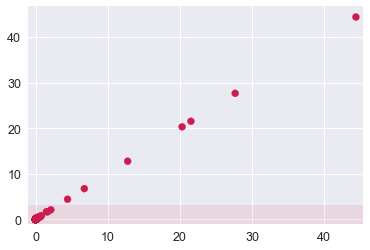

In [49]:
#meshgrid

def make_meshgrid(x,y,h=0.02):
    x_min, x_max = x.min() - 1,x.max() + 1
    y_min, y_max = y.min() - 1,y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx,yy

def plot_contours(ax,clf,xx,yy,**params):
    a=np.c_[xx.ravel(),yy.ravel()]
    print(a)
    Z = clf.predict(a)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out
 
from sklearn import svm    
model = svm.SVC(kernel='rbf',degree=9)
model.fit(X[:,[1,2]],y)
xx,yy = make_meshgrid(X[:,[1,2]],y)
plot_contours(plt,model,xx,yy,alpha=0.1)
plt.scatter(X[:,1],X[:,2],c=y)
plt.show()

### Visualising the Test set results


In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

ValueError: operands could not be broadcast together with shapes (21622500,2) (58,) 

In [ ]:
jaja = ['P. ESI','P. Ts Mean (K)']
dryX = X[jaja]
dryy=y
from sklearn.cross_validation import train_test_split
dryX_train, dryX_test, dryy_train, dryy_test = train_test_split(dryX, y, test_size = 0.25, random_state = 120)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dryX_train = sc.fit_transform(dryX_train)
dryX_test = sc.transform(dryX_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(dryX_train, dryy_train)

dryy_pred = classifier.predict(dryX_test)

xx,yy = make_meshgrid(dryX,dryy)
plot_contours(plt,classifier,xx,yy,alpha=0.4)
plt.scatter(X[:,-2],X[:,-1],c=y)
plt.show()

In [ ]:
X

Appendix: 
------------------------
[1] RAW Data Source: http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database
PHL's Exoplanets Catalog
Last Update: July 2, 2018
Introduction
The PHL's Exoplanets Catalog (PHL-EC) contains observed and modeled parameters for all currently confirmed exoplanets from the Extrasolar Planets Encyclopedia and NASA Kepler candidates from the NASA Exoplanet Archive, including those potentially habitable. It also contains a few still unconfirmed exoplanets of interest. The main difference between PHL-EC and other exoplanets databases is that it contains more estimated stellar and planetary parameters, habitability assessments with various habitability metrics, planetary classifications, and many corrections. Some interesting inclusions are the identification of those stars in the Catalog of Nearby Habitable Systems (HabCat), the apparent size and brightness of stars and planets as seen from a vantage point (i.e. moon-Earth distance), and the location constellation of each planet.


[2] A Comparative Study in Classification Methods of Exoplanets:
Machine Learning Exploration via Mining and Automatic Labeling
of the Habitability Catalog
Surbhi Agrawal1 ?, Suryoday Basak1
, Snehanshu Saha1†, Marialis Rosario-Franco2
,
Swati Routh3
, Kakoli Bora4
, Abhijit Jeremiel Theophilus1
1Department of Computer Science and Engineering, PESIT Bangalore South Campus, Karnataka, India 560100
2Physics Department, University of Texas at Arlington
3Physics Department, CPGS, Jain University
4Department of Information Science and Engineering, PESIT Bangalore South Campus, Karnataka, India 560100

[3] Source of Imputed Data: https://github.com/SuryodayBasak/exoplanets_data/blob/master/exoplanets_dataset.csv
